Jesse Smith, Mitchell Melby
CPSC 393 
Final - EDA Code

Imports

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *
from matplotlib.gridspec import GridSpec
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras import models, layers, optimizers, losses, metrics
from tensorflow.keras import optimizers
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import StandardScaler
import keras.utils
from tensorflow.keras import utils as np_utils


# Allow for outputs from one cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

pd.set_option('display.max_columns', 80)

import warnings
warnings.filterwarnings('ignore')

Read .csv files

In [2]:
characteristics = pd.read_csv("Data\caracteristiques-2019.csv")
characteristics.name = 'characteristics'
places = pd.read_csv("Data\lieux-2019.csv")
places.name = 'places'
vehicles = pd.read_csv("Data\Vehicules-2019.csv")
vehicles.name = 'vehicles'
drivers = pd.read_csv(r"Data\usagers-2019.csv") #not sure why this one was erroring with 'r'
drivers.name = 'drivers'

View shape of dataframes

In [3]:
datasets = [characteristics, places, vehicles, drivers]

characteristics = characteristics.set_index('Num_Acc')
places = places.set_index('Num_Acc')
vehicles = vehicles.set_index('id_vehicule')
drivers = drivers.set_index('id_vehicule')

for df in datasets:
    print (df.name,":",df.shape[0],"rows",df.shape[1],"columns")

characteristics : 58840 rows 15 columns
places : 58840 rows 18 columns
vehicles : 100710 rows 11 columns
drivers : 132977 rows 15 columns


View head of data frames

In [4]:
characteristics.head()

,jour,mois,an,hrmn,lum,dep,com,agg,int,atm,col,adr,lat,long
Num_Acc,,,,,,,,,,,,,,
201900000001,30.0,11.0,2019.0,0.062500,4.0,93,93053,1.0,1.0,1.0,2.0,AUTOROUTE A3,488962100.0,24701200.0
201900000002,30.0,11.0,2019.0,0.118056,3.0,93,93066,1.0,1.0,1.0,6.0,AUTOROUTE A1,489307000.0,23688000.0
201900000003,28.0,11.0,2019.0,0.635417,1.0,92,92036,1.0,1.0,1.0,4.0,AUTOROUTE A86,489358718.0,23191744.0
201900000004,30.0,11.0,2019.0,0.847222,5.0,94,94069,1.0,1.0,1.0,4.0,A4,488173295.0,24281502.0
201900000005,30.0,11.0,2019.0,0.166667,3.0,94,94028,1.0,1.0,1.0,2.0,A86 INT,487763620.0,24332540.0


In [5]:
places.head()

,catr,voie,v1,v2,circ,nbv,vosp,prof,pr,pr1,plan,lartpc,larrout,surf,infra,situ,vma
Num_Acc,,,,,,,,,,,,,,,,,
201900000001,1.0,3,0.0,NaN,3.0,10.0,0.0,1.0,6.0,900.0,2.0,NaN,NaN,1.0,2.0,1.0,70.0
201900000002,1.0,1,0.0,NaN,1.0,2.0,0.0,4.0,3.0,845.0,2.0,NaN,NaN,1.0,0.0,1.0,70.0
201900000003,1.0,86,0.0,NaN,3.0,8.0,0.0,1.0,10.0,500.0,3.0,NaN,NaN,1.0,0.0,1.0,90.0
201900000004,1.0,4,0.0,NaN,3.0,5.0,0.0,1.0,2.0,299.0,1.0,NaN,NaN,1.0,0.0,1.0,90.0
201900000005,1.0,86,0.0,INT,1.0,3.0,0.0,1.0,41.0,0.0,3.0,NaN,NaN,1.0,2.0,1.0,90.0


In [6]:
vehicles.head()

,Num_Acc,num_veh,senc,catv,obs,obsm,choc,manv,motor,occutc
id_vehicule,,,,,,,,,,
138 306 524,201900000001,B01,2,7,0,2,5,23,1,NaN
138 306 525,201900000001,A01,2,17,1,0,3,11,1,NaN
138 306 523,201900000002,A01,1,7,4,0,1,0,1,NaN
138 306 520,201900000003,A01,1,7,0,2,1,2,1,NaN
138 306 521,201900000003,B01,1,7,1,0,4,2,1,NaN


In [7]:
drivers.head()

,Num_Acc,num_veh,place,catu,grav,sexe,an_nais,trajet,secu1,secu2,secu3,locp,actp,etatp
id_vehicule,,,,,,,,,,,,,,
138 306 524,201900000001,B01,2,2,4,2,2002,0,1,0,-1,-1,-1,-1
138 306 524,201900000001,B01,1,1,4,2,1993,5,1,0,-1,-1,-1,-1
138 306 525,201900000001,A01,1,1,1,1,1959,0,1,0,-1,-1,-1,-1
138 306 523,201900000002,A01,1,1,4,2,1994,0,1,0,-1,-1,-1,-1
138 306 520,201900000003,A01,1,1,1,1,1996,0,1,0,-1,-1,0,-1


View missing values

In [8]:
missing_values = characteristics.isna().sum()
missing_values/len(characteristics)

jour    0.002158
mois    0.002158
an      0.002158
hrmn    0.002158
lum     0.002158
dep     0.002158
com     0.002158
agg     0.002158
int     0.002158
atm     0.002158
col     0.002158
adr     0.009415
lat     0.002158
long    0.002158
dtype: float64

In [9]:
missing_values = places.isna().sum()
missing_values/len(places)

catr       0.000442
voie       0.050323
v1         0.183073
v2         0.929181
circ       0.053892
nbv        0.011489
vosp       0.011812
prof       0.000680
pr         0.124456
pr1        0.129589
plan       0.000629
lartpc     0.996414
larrout    0.993678
surf       0.000799
infra      0.001207
situ       0.002413
vma        0.015415
dtype: float64

v2, lartpc, larrout will need to be dropped

In [10]:
missing_values = vehicles.isna().sum()
missing_values/len(vehicles)

Num_Acc    0.000000
num_veh    0.000000
senc       0.000000
catv       0.000000
obs        0.000000
obsm       0.000000
choc       0.000000
manv       0.000000
motor      0.000000
occutc     0.991143
dtype: float64

occutc will need to be removed

In [11]:
missing_values = drivers.isna().sum()
missing_values/len(drivers)

Num_Acc    0.0
num_veh    0.0
place      0.0
catu       0.0
grav       0.0
sexe       0.0
an_nais    0.0
trajet     0.0
secu1      0.0
secu2      0.0
secu3      0.0
locp       0.0
actp       0.0
etatp      0.0
dtype: float64

View data types

In [12]:
characteristics.dtypes

jour    float64
mois    float64
an      float64
hrmn    float64
lum     float64
dep      object
com      object
agg     float64
int     float64
atm     float64
col     float64
adr      object
lat     float64
long    float64
dtype: object

In [13]:
places.dtypes

catr       float64
voie        object
v1         float64
v2          object
circ       float64
nbv        float64
vosp       float64
prof       float64
pr         float64
pr1        float64
plan       float64
lartpc     float64
larrout    float64
surf       float64
infra      float64
situ       float64
vma        float64
dtype: object

In [14]:
vehicles.dtypes

Num_Acc      int64
num_veh     object
senc         int64
catv         int64
obs          int64
obsm         int64
choc         int64
manv         int64
motor        int64
occutc     float64
dtype: object

In [15]:
drivers.dtypes

Num_Acc     int64
num_veh    object
place       int64
catu        int64
grav        int64
sexe        int64
an_nais     int64
trajet      int64
secu1       int64
secu2       int64
secu3       int64
locp        int64
actp       object
etatp       int64
dtype: object

Visualize columns

<Figure size 1080x432 with 0 Axes>

[Text(0.5, 0, 'Severity'), Text(0.5, 1.0, 'Distribution of Injury Severity')]

[]

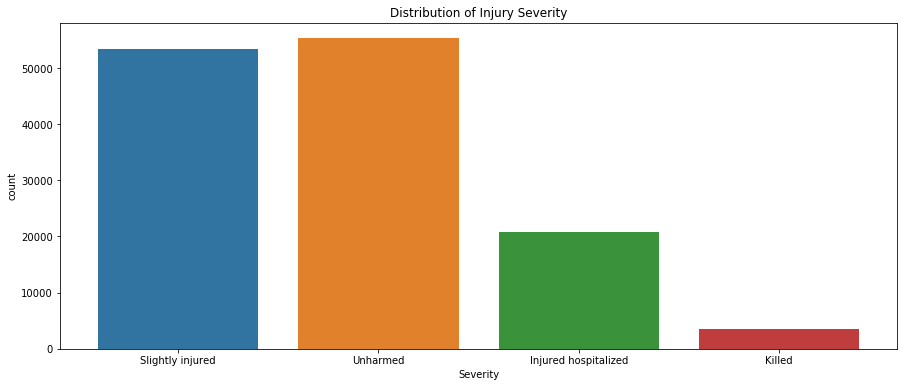

In [16]:
plt.figure(figsize=(15,6))
sns.countplot(df['grav'].map({1:'Unharmed',
                                  2:'Killed',
                                  3:'Injured hospitalized',
                                  4:'Slightly injured'
                                })).set(xlabel='Severity',title='Distribution of Injury Severity')
plt.plot()

<Figure size 1080x432 with 0 Axes>

[Text(0.5, 0, 'Department'), Text(0.5, 1.0, 'Count Accidents by Department')]

[]

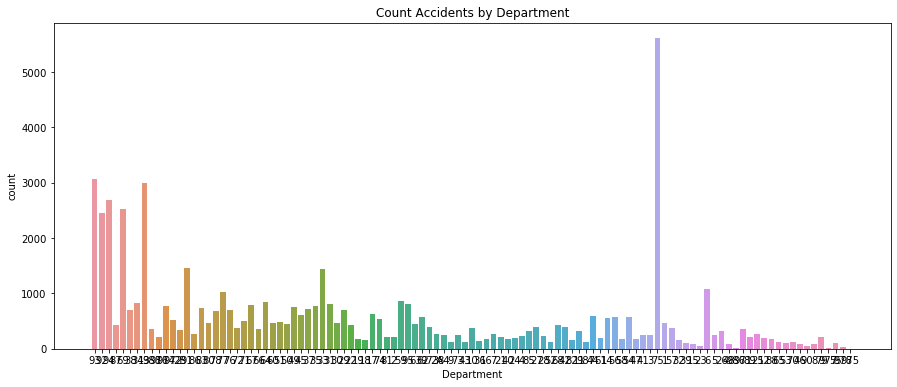

In [17]:
plt.figure(figsize=(15,6))
sns.countplot(characteristics['dep']).set(xlabel='Department',title='Count Accidents by Department')
plt.plot()

<Figure size 1080x432 with 0 Axes>

[Text(0.5, 0, 'Month'), Text(0.5, 1.0, 'Count Accidents by Month')]

[]

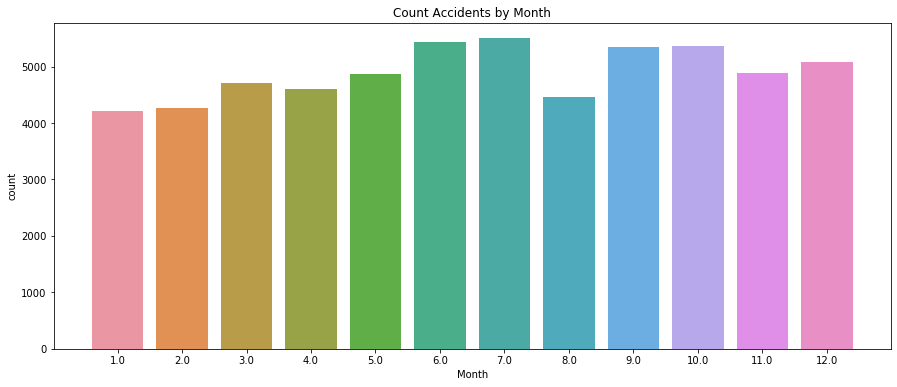

In [18]:
plt.figure(figsize=(15,6))
sns.countplot(characteristics['mois']).set(xlabel='Month',title='Count Accidents by Month')
plt.plot()

<Figure size 1080x432 with 0 Axes>

[Text(0.5, 0, 'Lighting'), Text(0.5, 1.0, 'Count Accidents by Lighting')]

[]

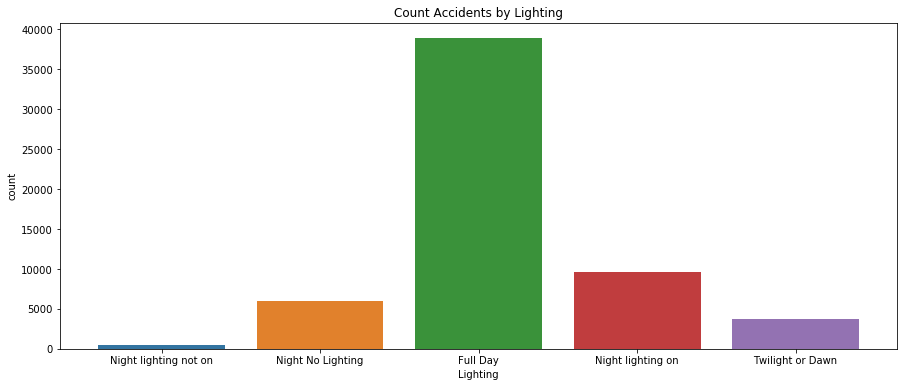

In [19]:
plt.figure(figsize=(15,6))
sns.countplot(characteristics['lum'].map({1:'Full Day',
                                  2:'Twilight or Dawn',
                                  3:'Night No Lighting',
                                  4:'Night lighting not on',
								  5:'Night lighting on'
                                })).set(xlabel='Lighting',title='Count Accidents by Lighting')
plt.plot()

<Figure size 1080x432 with 0 Axes>

[Text(0.5, 0, 'Type'),
 Text(0.5, 1.0, 'Count Severity by Type of Person in Accident')]

[]

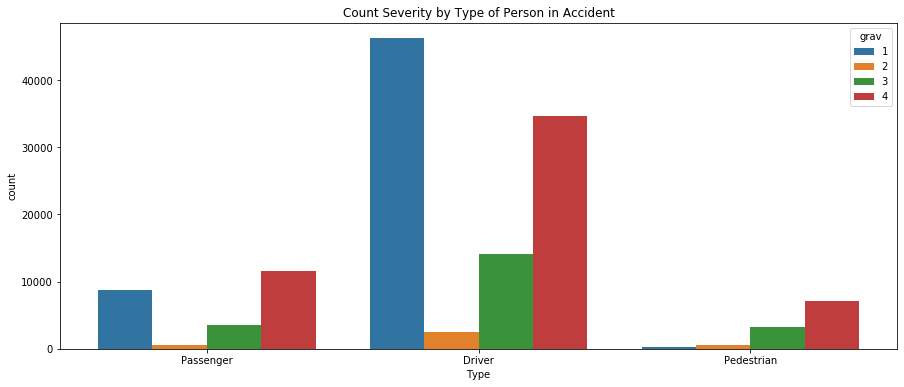

In [20]:
plt.figure(figsize=(15,6))
sns.countplot(drivers['catu'].map({1:'Driver',2:'Passenger',3:'Pedestrian'}),hue=drivers['grav']).set(xlabel='Type',title='Count Severity by Type of Person in Accident')
plt.plot()

<Figure size 1080x432 with 0 Axes>

[Text(0.5, 0, 'Type'),
 Text(0.5, 1.0, 'Count Severity by Type of Person in Accident')]

[]

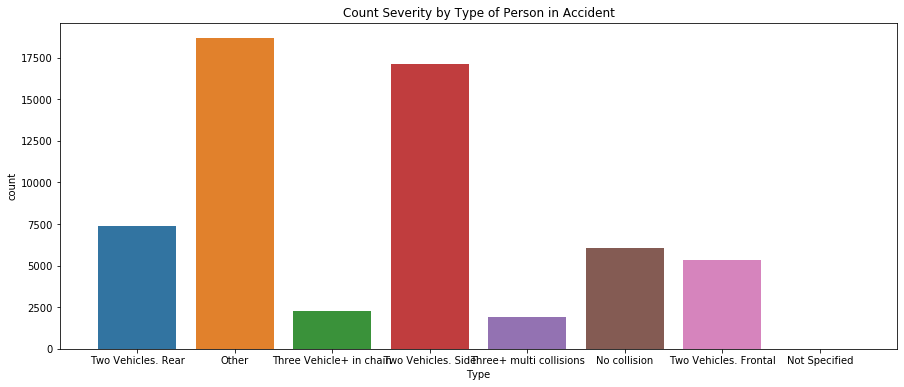

In [22]:
plt.figure(figsize=(15,6))
sns.countplot(characteristics['col'].map({-1:'Not Specified',1:'Two Vehicles. Frontal',2:'Two Vehicles. Rear',3:'Two Vehicles. Side',4:'Three Vehicle+ in chain',5:'Three+ multi collisions',6:'Other',7:'No collision'})).set(xlabel='Type',title='Count Severity by Type of Person in Accident')
plt.plot()

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Department'),
 Text(0.5, 1.0, '# Accidents by Department')]

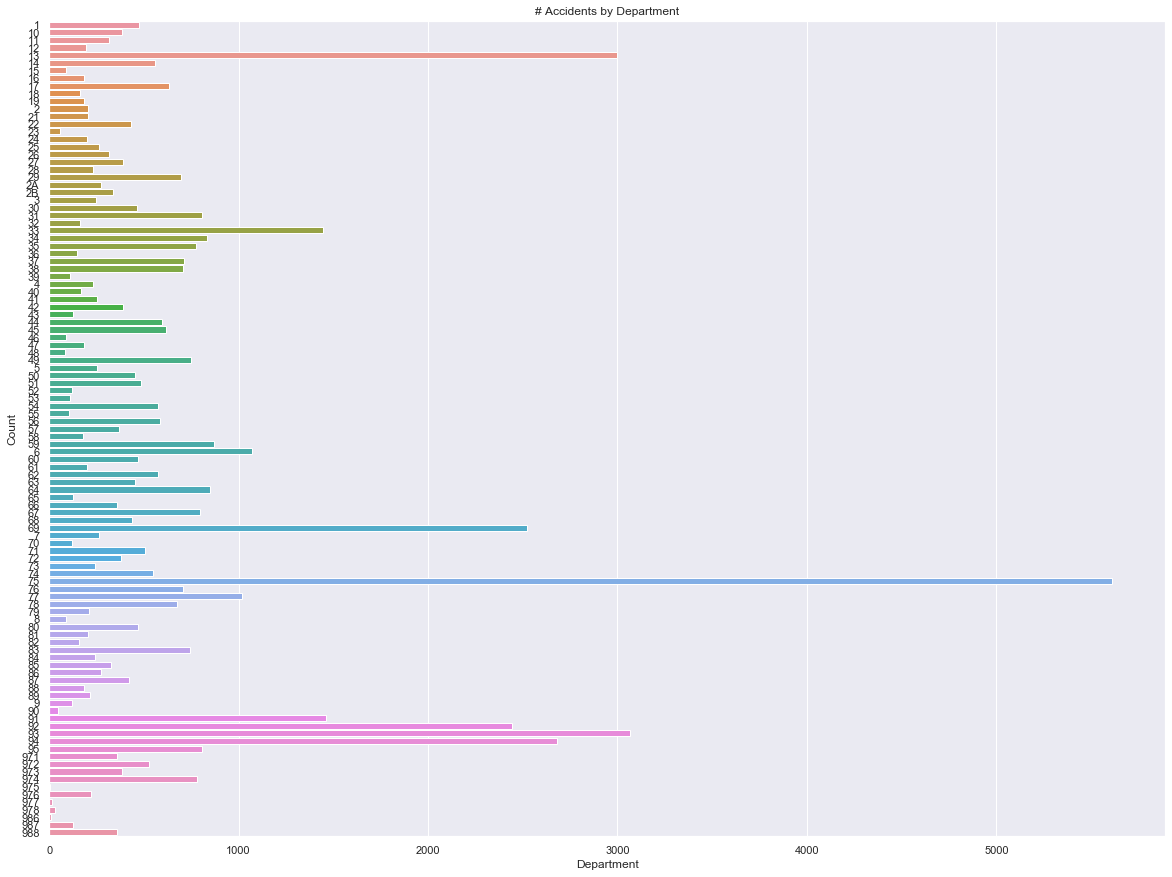

In [23]:
accidents_by_department = characteristics.groupby('dep').count().reset_index()
sns.set(rc = {'figure.figsize':(20,15)})
p = sns.barplot(data=accidents_by_department, x='jour',y='dep')
p.set(xlabel='Department', ylabel='Count',title='# Accidents by Department')

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Month'),
 Text(0.5, 1.0, '# Accidents by month')]

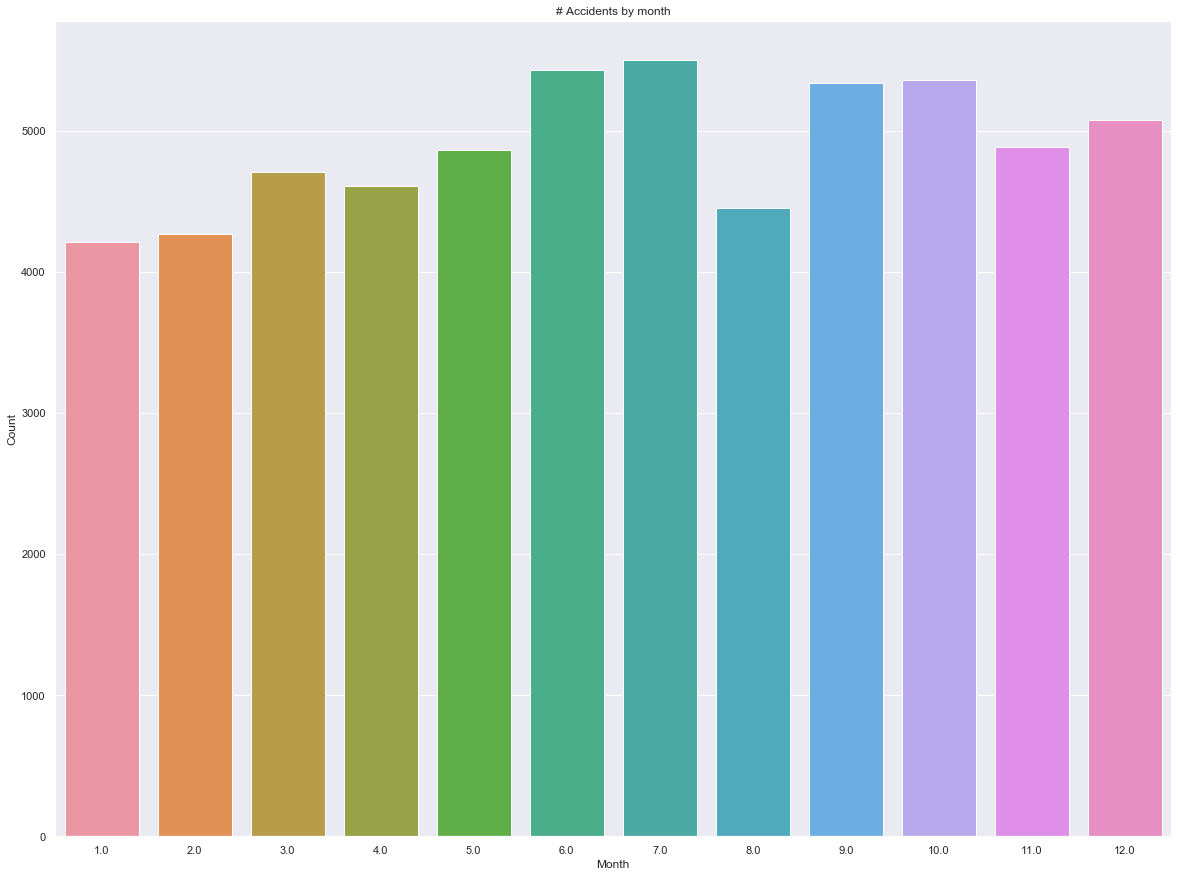

In [24]:
accidents_by_month = characteristics.groupby('mois').count().reset_index()
p = sns.barplot(data=accidents_by_month, x='mois',y='dep')
p.set(xlabel='Month', ylabel='Count', title='# Accidents by month')

Cleaning

Drop columns with high NAs

In [25]:
vehicles = vehicles.drop('occutc',axis=1)
places = places.drop(['v2','lartpc','larrout'],axis=1)

Modifying some features

In [26]:
characteristics = characteristics.drop(['an','adr','com'],axis=1)
characteristics['lat']=characteristics['lat']/10000000
characteristics['long']=characteristics['long']/10000000
characteristics = characteristics.drop('201900033874',axis=0)
#characteristics = characteristics[characteristics['dep']!='2B'] # comment / uncomment
#characteristics = characteristics[characteristics['dep']!='2A'] # comment / uncomment
#characteristics = characteristics[(characteristics['dep'].astype(float)<100)] # comment / uncomment
#places = places.loc[characteristics.index.values] # comment / uncomment
places = places.drop('201900033874',axis=0) # comment / uncomment
places = places.drop(['v1','vosp','pr','voie'],axis=1)

vehicles = vehicles.drop('obs',axis=1)
drivers = drivers.drop(['secu3'],axis=1)

Visualize accident locations

In [27]:
fig = px.scatter_mapbox(characteristics, 
                        lat="lat", 
                        lon="long", 
                        zoom=4.9, 
                        height=800, 
                        width=800)
fig.data[0]['marker'].update(color='red') 
fig.data[0]['marker'].update(size=3)
fig = fig.update_layout(mapbox_style="open-street-map")
fig = fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

scattermapbox.Marker({
    'color': 'red'
})

scattermapbox.Marker({
    'color': 'red', 'size': 3
})

Visualize

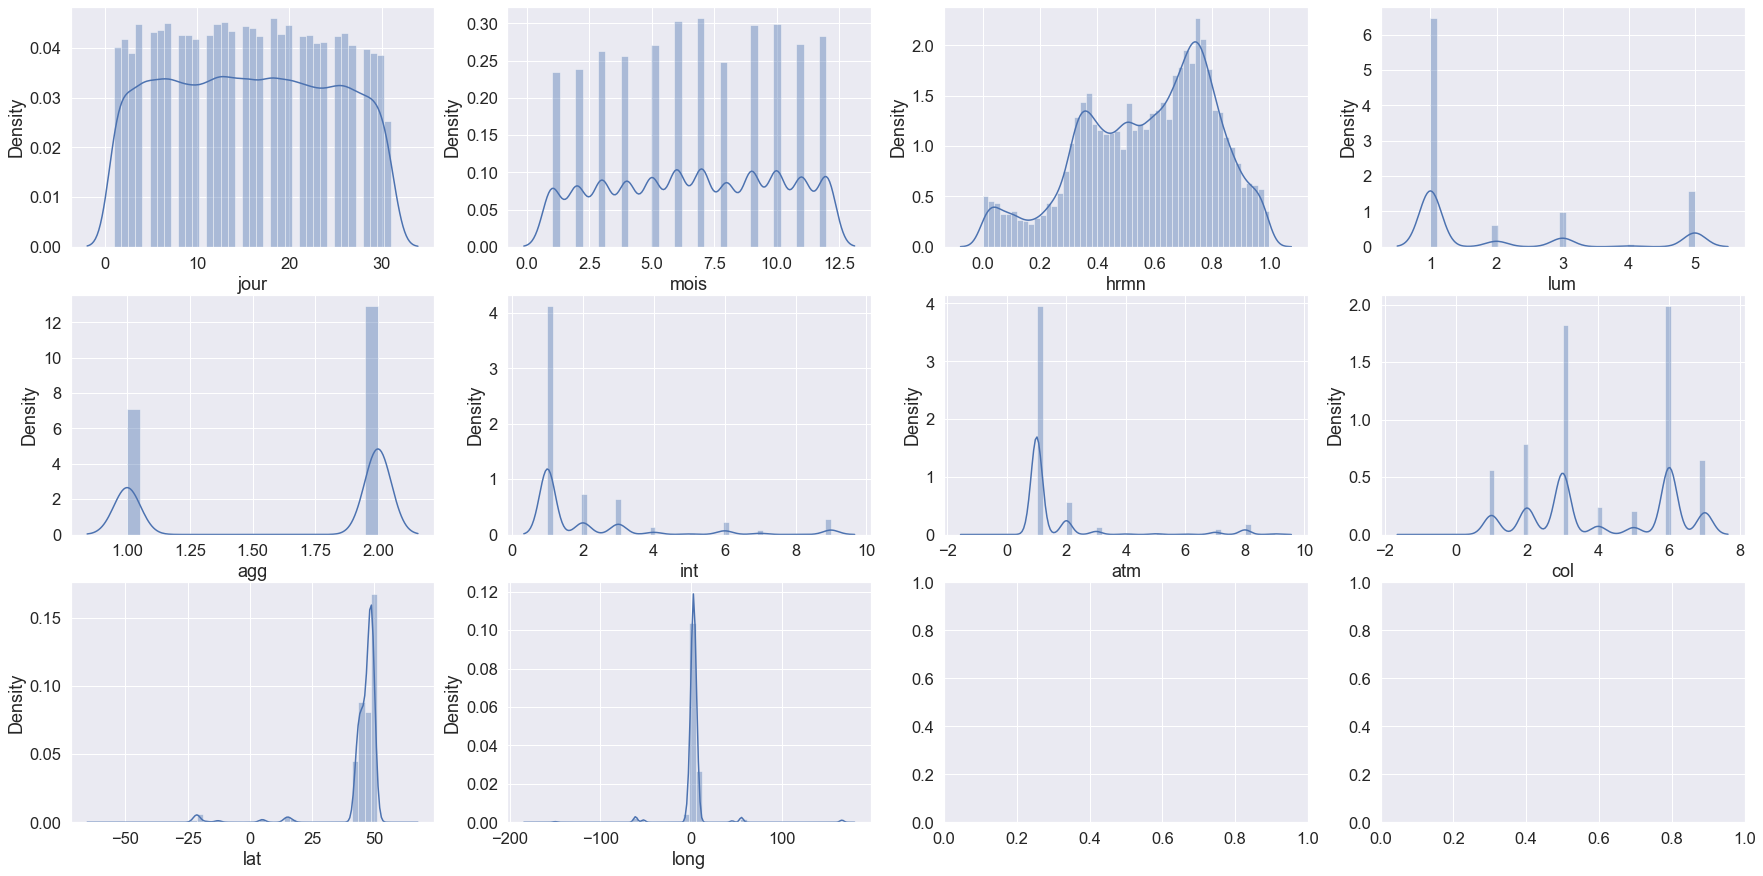

In [28]:
sns.set(font_scale = 1.5)
fig, ax = plt.subplots(3,4, figsize=(30, 15))
i=0
for col in characteristics.select_dtypes(include=['float64','int64']):
    sns.distplot(characteristics[col],label=col,ax=ax[i//4][i%4])
    i=i+1
fig.show()

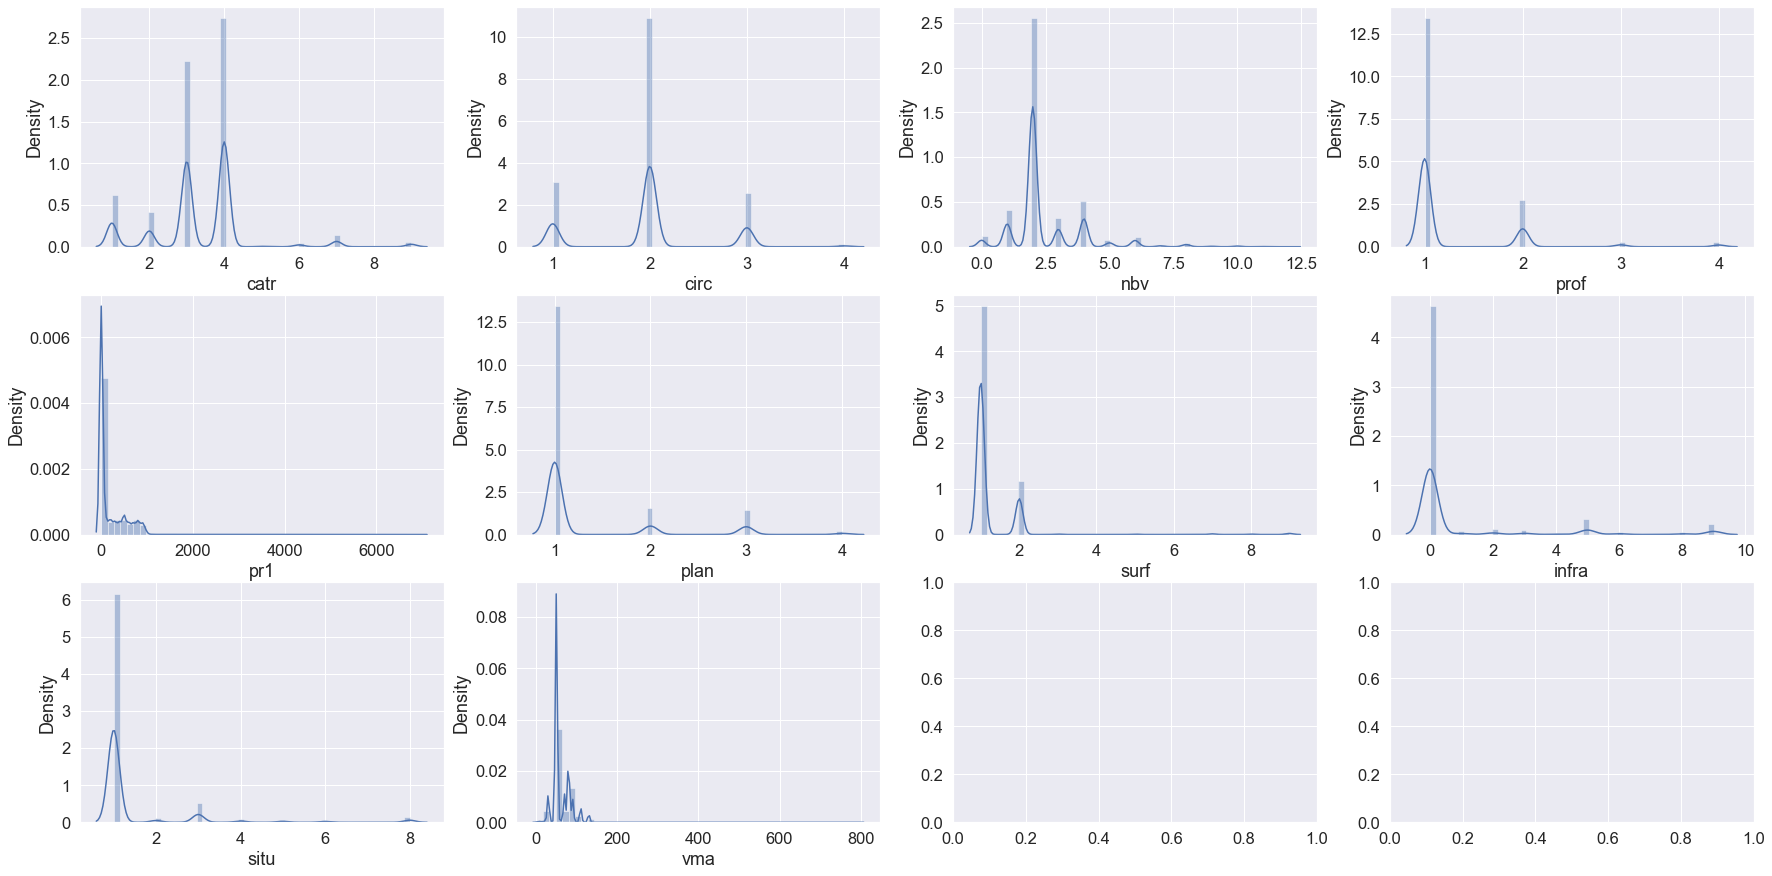

In [29]:
sns.set(font_scale = 1.5)
fig, ax = plt.subplots(3,4, figsize=(30, 15))
i=0
for col in places.select_dtypes(include=['float64','int64']):
    sns.distplot(places[col],label=col,ax=ax[i//4][i%4])
    i=i+1
fig.show()

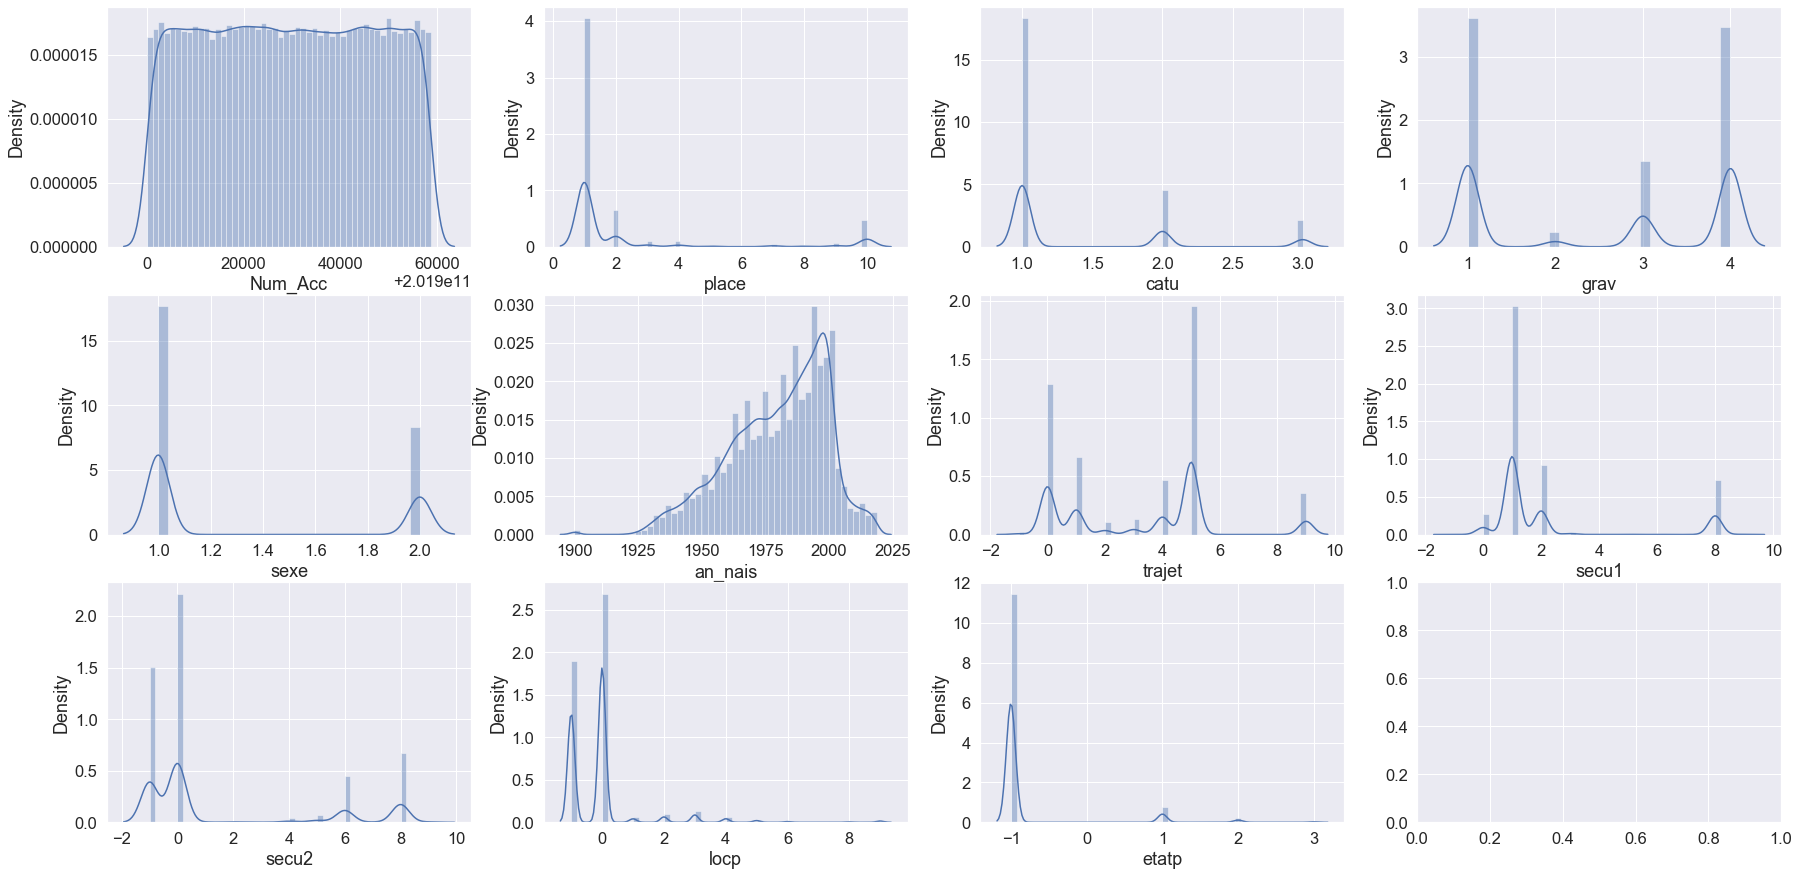

In [30]:
sns.set(font_scale = 1.5)
fig, ax = plt.subplots(3,4, figsize=(30, 15))
i=0
for col in drivers.select_dtypes(include=['float64','int64']):
    sns.distplot(drivers[col],label=col,ax=ax[i//4][i%4])
    i=i+1
fig.show()

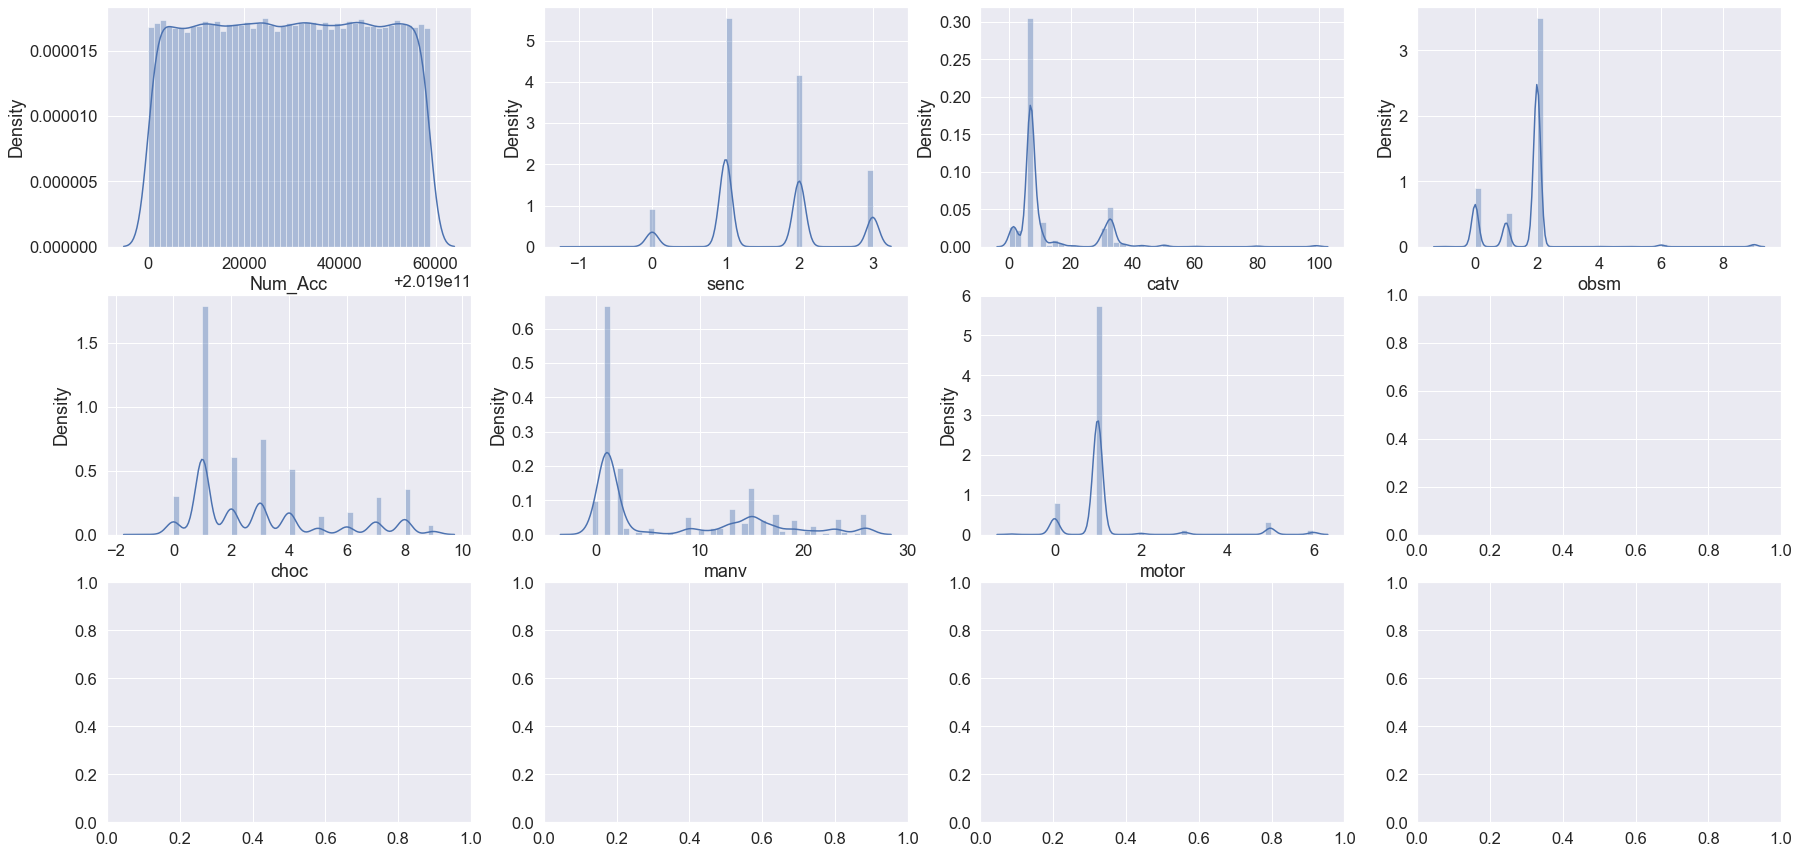

In [31]:
sns.set(font_scale = 1.5)
fig, ax = plt.subplots(3,4, figsize=(30, 15))
i=0
for col in vehicles.select_dtypes(include=['float64','int64']):
    sns.distplot(vehicles[col],label=col,ax=ax[i//4][i%4])
    i=i+1
fig.show()